## Data preparation and Visualization for Salesstore Dataset

In this exercise, some data filtration and visualization procedures have been applied to the salesstore dataset form kaggle to understand the profit and loss cases.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sales = pd.read_csv('C:/Users/user/Documents/Data Analytics/Salesstore.csv')

In [3]:
sales.head()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


## DATA PREPROCESSING

In orther to understand the data, filtration by regions have to be done. This will give us insights on the ratio of regions available to the company.

In [4]:
# counting regions
region = sales['Region'].value_counts()
region
reg = pd.DataFrame(region)
reg = reg.reset_index()
reg

,index,Region
0,West,232
1,Atlantic,170
2,Northwest Territories,150
3,Prarie,79
4,Ontario,67
5,Nunavut,32


## DATA FILTRATION

Once all the total regions are counted, the next step is to know which region experiences the most loss.  

In [5]:
for i in reg['index']:
    loss_region = sales.loc[(sales['Region']==i) & (sales['Profit']<0)].shape[0]
    print(f"{i} has {loss_region} instances of loss")

West has 114 instances of loss
Atlantic has 82 instances of loss
Northwest Territories has 73 instances of loss
Prarie has 43 instances of loss
Ontario has 37 instances of loss
Nunavut has 16 instances of loss


From the filtration process above we can see that the west region experiences the most loss. However, comparing the instances
of loss in each region and the total number of shipment made to the regions, it can be seen that the loss and profit instances
split right in the middle. Also they also ship more items to the West regions, therefore the losses there would naturally be 
higher. The next step is to see how much losses are expeienced in each region

In [6]:
for i in reg['index']:
    loss_value =sales.loc[((sales['Region']== i) & (sales['Profit']<0)),['Region','Profit','Product_Sub-Category']]
    regions = pd.DataFrame(loss_value)
    losses = regions['Profit'].sum()
    print(regions)
    print(f"Tolal loss for {i} is {losses}\n")

    Region  Profit            Product_Sub-Category
8     West -379.29                 Copiers and Fax
10    West -261.45              Office Furnishings
12    West  -34.43              Office Furnishings
18    West -318.45                          Tables
19    West -219.61                      Appliances
..     ...     ...                             ...
629   West  -56.15                           Paper
658   West  -93.30             Pens & Art Supplies
661   West  -90.90  Binders and Binder Accessories
663   West  -29.60                           Paper
664   West  -56.22                           Paper

[114 rows x 3 columns]
Tolal loss for West is -18349.44

       Region   Profit            Product_Sub-Category
13   Atlantic  -425.14          Storage & Organization
21   Atlantic -1561.72                          Tables
22   Atlantic  -553.06          Storage & Organization
23   Atlantic  -849.18          Storage & Organization
36   Atlantic  -232.24          Storage & Organization


In [7]:
# Relationship between Sum of losses in each City
loss_data = sales.loc[(sales['Profit']<0) & (sales['Region']), ['Region','Profit']]
loss_data
loss = loss_data.groupby(by = ['Region']).sum()
#changing Profit Column name to Loss
loss['Loss'] = loss['Profit']
loss = loss.drop(columns=['Profit'])
loss

,Loss
Region,
Atlantic,-19183.44
Northwest Territories,-11456.13
Nunavut,-3970.28
Ontario,-4148.85
Prarie,-7207.55
West,-18349.44


<AxesSubplot:xlabel='Region'>

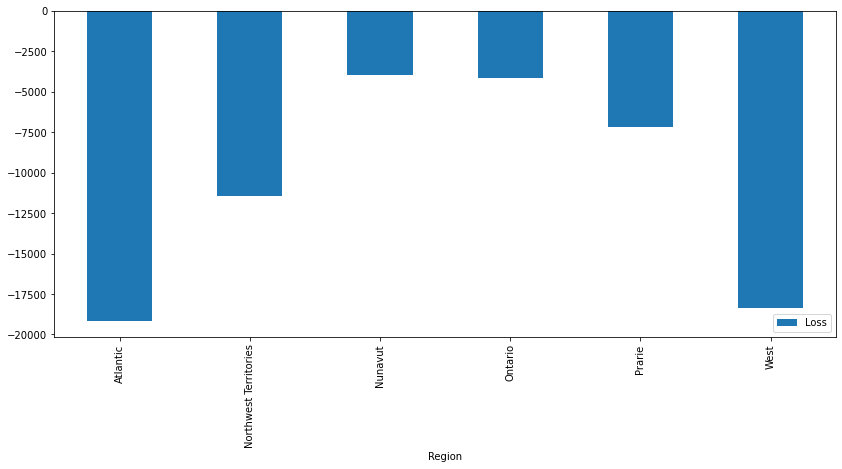

In [8]:
loss.plot(kind = 'bar', figsize = (14,6))

## Analyzing Product Sub Category with Profit and Loss

In [9]:
loss =sales.loc[(sales['Profit']<0),['Region','Profit','Product_Sub-Category']]

In [10]:
loss1 = pd.DataFrame(loss)
loss1

,Region,Profit,Product_Sub-Category
0,Nunavut,-695.26,Storage & Organization
2,Northwest Territories,-329.49,Storage & Organization
3,Northwest Territories,-4.19,Chairs & Chairmats
4,Northwest Territories,-743.96,Storage & Organization
5,Northwest Territories,-2088.68,Appliances
...,...,...,...
715,Ontario,-46.12,Binders and Binder Accessories
717,Ontario,-228.24,Binders and Binder Accessories
721,Ontario,-41.58,Paper
722,Ontario,-212.55,Telephones and Communication


In [11]:
profit =sales.loc[(sales['Profit']>=0),['Region','Profit','Product_Sub-Category']]

In [12]:
profit1 = pd.DataFrame(profit)
profit1

,Region,Profit,Product_Sub-Category
1,Northwest Territories,737.94,Office Furnishings
6,Northwest Territories,171.26,Appliances
7,Atlantic,983.55,Copiers and Fax
9,West,958.80,Office Furnishings
11,West,595.38,Office Furnishings
...,...,...,...
724,Ontario,172.33,Telephones and Communication
725,Ontario,1886.41,Binders and Binder Accessories
726,Ontario,5.30,Binders and Binder Accessories
727,Ontario,310.22,Binders and Binder Accessories


In [13]:
# sum of subcategories with profit
profit1['Profit'].sum()

215775.53000000003

In [14]:
# total sum subcategories with losses
loss1['Profit'].sum()

-64315.689999999995

## Analyzing each Product Sub Category

In [15]:
office = loss1.loc[loss1['Product_Sub-Category']=='Office Furnishings', ['Profit']].sum()
office

Profit   -4674.48
dtype: float64

In [16]:
appliances = loss1.loc[loss1['Product_Sub-Category']=='Appliances', ['Profit']].sum()
appliances

Profit   -4640.04
dtype: float64

In [17]:
copiers = loss1.loc[loss1['Product_Sub-Category']=='Copiers and Fax', ['Profit']].sum()
copiers

Profit   -10941.59
dtype: float64

In [18]:
tel = loss1.loc[loss1['Product_Sub-Category']=='Telephones and Communication', ['Profit']].sum()
tel

Profit   -6344.24
dtype: float64

In [19]:
binder = loss1.loc[loss1['Product_Sub-Category']=='Binders and Binder Accessories', ['Profit']].sum()
binder

Profit   -5730.72
dtype: float64

In [20]:
storage = loss1.loc[loss1['Product_Sub-Category']=='Storage & Organization', ['Profit']].sum()
storage

Profit   -13636.61
dtype: float64

In [21]:
paper = loss1.loc[loss1['Product_Sub-Category']=='Paper', ['Profit']].sum()
paper

Profit   -7245.07
dtype: float64

In [22]:
computer = loss1.loc[loss1['Product_Sub-Category']=='Computer Peripherals', ['Profit']].sum()
computer

Profit   -4030.1
dtype: float64

In [23]:
labels = loss1.loc[loss1['Product_Sub-Category']=='Labels', ['Profit']].sum()
labels

Profit   -46.95
dtype: float64

In [24]:
envelopes = loss1.loc[loss1['Product_Sub-Category']=='Envelopes', ['Profit']].sum()
envelopes

Profit   -497.43
dtype: float64

In [25]:
machines = loss1.loc[loss1['Product_Sub-Category']=='Office Machines', ['Profit']].sum()
machines

Profit   -464.67
dtype: float64

In [26]:
chair = loss1.loc[loss1['Product_Sub-Category']=='Chairs & Chairmats', ['Profit']].sum()
chair

Profit   -323.23
dtype: float64

In [27]:
tables = loss1.loc[loss1['Product_Sub-Category']=='Tables', ['Profit']].sum()
tables

Profit   -3887.68
dtype: float64

In [28]:
scissors = loss1.loc[loss1['Product_Sub-Category']=='Scissors, Rulers and Trimmers', ['Profit']].sum()
scissors

Profit   -1759.58
dtype: float64

In [29]:
pens = loss1.loc[loss1['Product_Sub-Category']=='Pens & Art Supplies', ['Profit']].sum()
pens

Profit   -93.3
dtype: float64

In [30]:
product_sub = pd.DataFrame(sales['Product_Sub-Category'].value_counts())
product_sub['Losses'] = [binder.values,paper.values,tel.values,office.values,storage.values,computer.values,appliances.values,
                                                             labels.values,envelopes.values,machines.values,copiers.values,chair.values,tables.values,pens.values,scissors.values]
product_sub

,Product_Sub-Category,Losses
Binders and Binder Accessories,137,[-5730.72]
Paper,120,[-7245.070000000001]
Telephones and Communication,94,[-6344.240000000001]
Office Furnishings,83,[-4674.4800000000005]
Storage & Organization,63,[-13636.61]
Computer Peripherals,54,[-4030.0999999999995]
Appliances,54,[-4640.040000000001]
Labels,38,[-46.95]
Envelopes,33,[-497.43]
Office Machines,24,[-464.67]


In [31]:
product_sub['Losses'].sum()

array([-64315.69])

In [32]:
poo=pd.DataFrame(product_sub['Losses'].abs())
poo

,Losses
Binders and Binder Accessories,[5730.72]
Paper,[7245.070000000001]
Telephones and Communication,[6344.240000000001]
Office Furnishings,[4674.4800000000005]
Storage & Organization,[13636.61]
Computer Peripherals,[4030.0999999999995]
Appliances,[4640.040000000001]
Labels,[46.95]
Envelopes,[497.43]
Office Machines,[464.67]


In [33]:
poo['Losses'] = poo['Losses'].apply(lambda x: int(x)) 
poo

,Losses
Binders and Binder Accessories,5730
Paper,7245
Telephones and Communication,6344
Office Furnishings,4674
Storage & Organization,13636
Computer Peripherals,4030
Appliances,4640
Labels,46
Envelopes,497
Office Machines,464


<AxesSubplot:ylabel='Losses'>

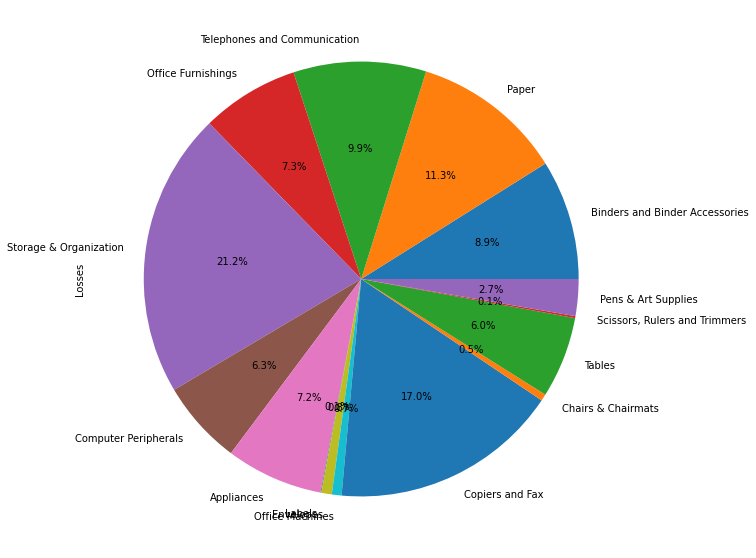

In [34]:
#plot pie chart of losses in subcategory

poo['Losses'].plot(kind = 'pie', figsize=(10,10), autopct = '%1.1f%%')

From the pie chart above, the product category with the highest loss instance is the Storage & Organization category and next to it is the Copiers and Fax category. In the next step, we will carry out the same processes to know the product sub category with the most profit.

In [35]:
office2 = profit1.loc[profit1['Product_Sub-Category']=='Office Furnishings', ['Profit']].sum()

In [36]:
appliances2 = profit1.loc[profit1['Product_Sub-Category']=='Appliances', ['Profit']].sum()

In [37]:
copiers2 = profit1.loc[profit1['Product_Sub-Category']=='Copiers and Fax', ['Profit']].sum()

In [38]:
tel2 = profit1.loc[profit1['Product_Sub-Category']=='Telephones and Communication', ['Profit']].sum()
binder2 = profit1.loc[profit1['Product_Sub-Category']=='Binders and Binder Accessories', ['Profit']].sum()
storage2 = profit1.loc[profit1['Product_Sub-Category']=='Storage & Organization', ['Profit']].sum()
paper2 = profit1.loc[profit1['Product_Sub-Category']=='Paper', ['Profit']].sum()
computer2 = profit1.loc[profit1['Product_Sub-Category']=='Computer Peripherals', ['Profit']].sum()
labels2 = profit1.loc[profit1['Product_Sub-Category']=='Labels', ['Profit']].sum()
envelopes2 = profit1.loc[profit1['Product_Sub-Category']=='Envelopes', ['Profit']].sum()
machines2 = profit1.loc[profit1['Product_Sub-Category']=='Office Machines', ['Profit']].sum()
chair2 = profit1.loc[profit1['Product_Sub-Category']=='Chairs & Chairmats', ['Profit']].sum()
tables2 = profit1.loc[profit1['Product_Sub-Category']=='Tables', ['Profit']].sum()
scissors2 = profit1.loc[profit1['Product_Sub-Category']=='Scissors, Rulers and Trimmers', ['Profit']].sum()
pens2 = profit1.loc[profit1['Product_Sub-Category']=='Pens & Art Supplies', ['Profit']].sum()

In [39]:
product_sub3 = pd.DataFrame(sales['Product_Sub-Category'].value_counts())
product_sub3

,Product_Sub-Category
Binders and Binder Accessories,137
Paper,120
Telephones and Communication,94
Office Furnishings,83
Storage & Organization,63
Computer Peripherals,54
Appliances,54
Labels,38
Envelopes,33
Office Machines,24


In [40]:
#DataFrame for all Product Sub Category with Profit
product_sub3['Profit'] = [binder2.values,paper2.values,tel2.values,office2.values,storage2.values,computer2.values,appliances2.values,
                                                             labels2.values,envelopes2.values,machines2.values,copiers2.values,chair2.values,tables2.values,pens2.values,scissors2.values]
product_sub3

,Product_Sub-Category,Profit
Binders and Binder Accessories,137,[32022.46]
Paper,120,[10369.710000000001]
Telephones and Communication,94,[54336.409999999996]
Office Furnishings,83,[13374.740000000002]
Storage & Organization,63,[9068.63]
Computer Peripherals,54,[9012.16]
Appliances,54,[27371.900000000005]
Labels,38,[1343.5500000000002]
Envelopes,33,[6547.4]
Office Machines,24,[27297.1]


In [41]:
prod=pd.DataFrame(product_sub3['Profit'])
prod

,Profit
Binders and Binder Accessories,[32022.46]
Paper,[10369.710000000001]
Telephones and Communication,[54336.409999999996]
Office Furnishings,[13374.740000000002]
Storage & Organization,[9068.63]
Computer Peripherals,[9012.16]
Appliances,[27371.900000000005]
Labels,[1343.5500000000002]
Envelopes,[6547.4]
Office Machines,[27297.1]


In [42]:
produ = pd.DataFrame(prod['Profit'].apply(lambda x: int(x))) 
produ

,Profit
Binders and Binder Accessories,32022
Paper,10369
Telephones and Communication,54336
Office Furnishings,13374
Storage & Organization,9068
Computer Peripherals,9012
Appliances,27371
Labels,1343
Envelopes,6547
Office Machines,27297


<AxesSubplot:ylabel='Profit'>

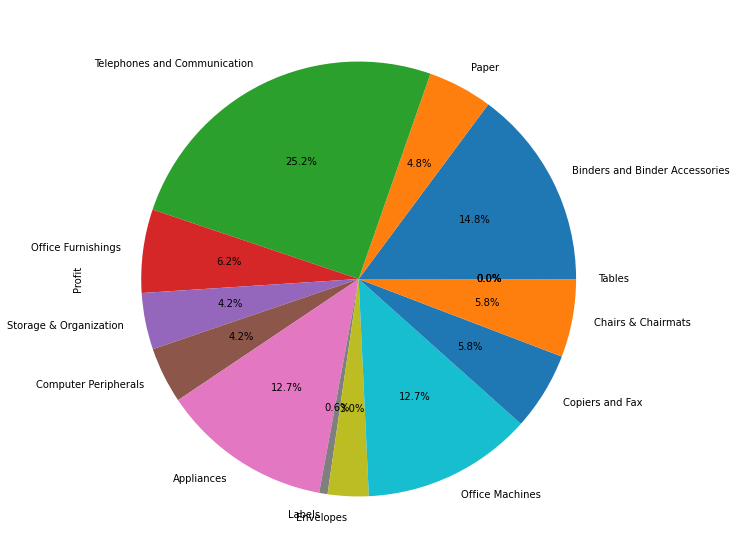

In [43]:
#plotting pie chart
produ['Profit'].plot(kind = 'pie', figsize=(10,10), autopct = '%1.1f%%')

From the pie chart above, the Telephone and Communication product sub category have the highest instances of profit next to Binders and Binder Accessories.

<AxesSubplot:>

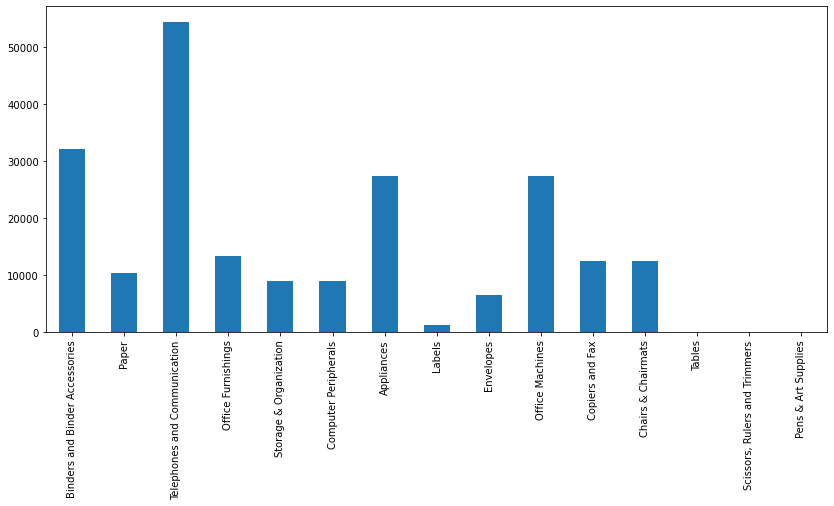

In [44]:
# bar chart product sub category profit representation 
produ['Profit'].plot(kind = 'bar', figsize=(14,6))

In [45]:
poo['Losses'] = poo['Losses'].apply(lambda x: int(-x)) 
poo

,Losses
Binders and Binder Accessories,-5730
Paper,-7245
Telephones and Communication,-6344
Office Furnishings,-4674
Storage & Organization,-13636
Computer Peripherals,-4030
Appliances,-4640
Labels,-46
Envelopes,-497
Office Machines,-464


<AxesSubplot:>

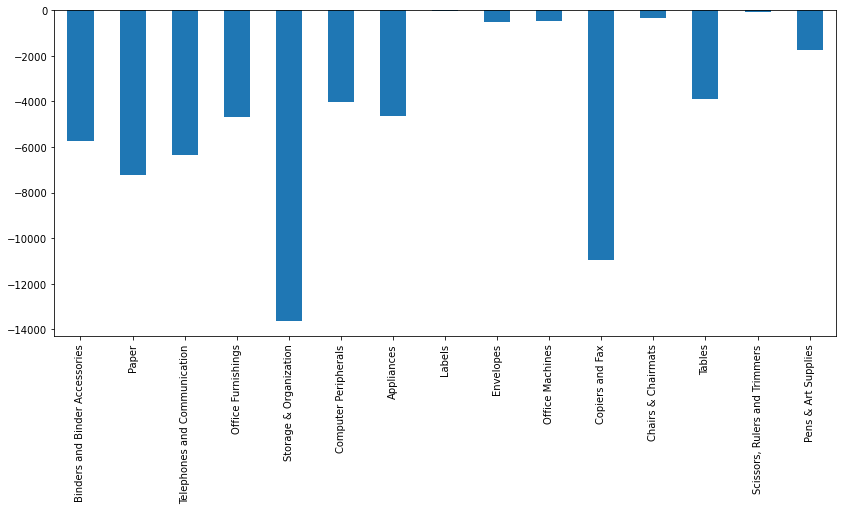

In [46]:
# bar chart product sub category loss representation 
poo['Losses'].plot(kind = 'bar', figsize=(14,6))

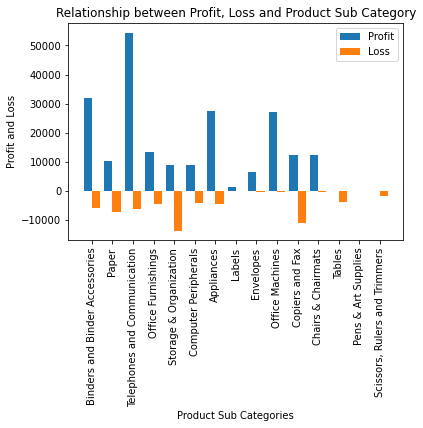

In [47]:
# Relationship between Profit, Loss and Product Sub Category

Xi = ['Binders and Binder Accessories','Paper','Telephones and Communication','Office Furnishings','Storage & Organization',
     'Computer Peripherals', 'Appliances', 'Labels', 'Envelopes', 'Office Machines', 'Copiers and Fax', 'Chairs & Chairmats',
     'Tables', 'Pens & Art Supplies','Scissors, Rulers and Trimmers']
Profit_ = produ['Profit']
Loss_ = poo['Losses']
  
X_axis = np.arange(len(Xi))
  
plt.bar(X_axis - 0.2, Profit_, 0.4, label = 'Profit')
plt.bar(X_axis + 0.2, Loss_, 0.4, label = 'Loss')

plt.xticks(X_axis, Xi, rotation = 90)
plt.xlabel("Product Sub Categories")
plt.ylabel("Profit and Loss")
plt.title("Relationship between Profit, Loss and Product Sub Category")
plt.legend()
plt.show()

## Linear Regression

The linear regression model will be used to predict the profit based on the order quantity and sales

In [48]:
#importing necessary libraries
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
sales.head()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


In [50]:
#DataFrame of Order Quantity, sales and Profit
new_pr = pd.DataFrame(sales, columns = ['Order_Quantity','Sales','Profit'])
new_pr

,Order_Quantity,Sales,Profit
0,21,2781.82,-695.26
1,35,3389.93,737.94
2,7,2039.56,-329.49
3,6,905.94,-4.19
4,24,1168.15,-743.96
...,...,...,...
725,44,5347.13,1886.41
726,22,127.33,5.30
727,24,990.10,310.22
728,5,28.32,-14.35


In [51]:
import seaborn as sn
from sklearn import datasets

In [52]:
# Correlation matrix of Order Quantity, sales and profit
matrix = new_pr.corr()
matrix

,Order_Quantity,Sales,Profit
Order_Quantity,1.000000,0.204255,0.197149
Sales,0.204255,1.000000,0.595711
Profit,0.197149,0.595711,1.000000


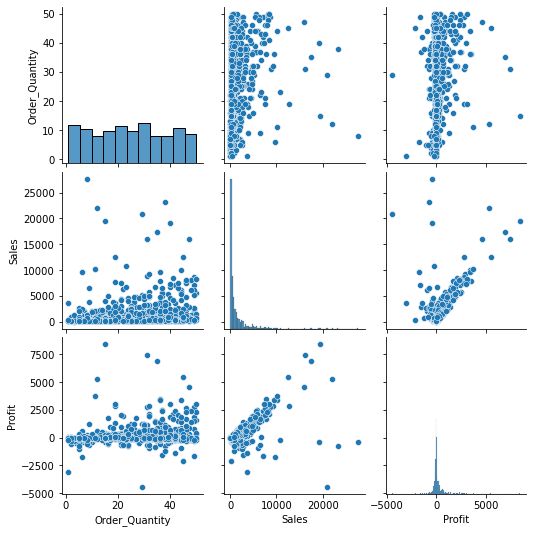

In [53]:
#pairplot
sn.pairplot(new_pr)

In [54]:
X = new_pr[['Order_Quantity','Sales']].values
Y = new_pr['Profit'].values.reshape(-1,1)

In [55]:
#size of X and Y

X.shape, Y.shape

((730, 2), (730, 1))

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
#splitting train and test into 80% and 20% respectively

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [58]:
#size of X train and Y train
X_train.shape, Y_train.shape

((584, 2), (584, 1))

In [59]:
#size of X test and Y test
X_test.shape, Y_test.shape

((146, 2), (146, 1))

In [60]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
#plotting the linear regression model

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [62]:
#predicting Y values with X test
Y_pred = model.predict(X_test)

In [63]:
#Coefficient result
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error: %.2f'
     % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
     % r2_score(Y_test, Y_pred))

Coefficients: [[3.95744116 0.15506566]]
Intercept: [-134.66138594]
Mean squared error: 445198.45
Coefficient of determination (R^2): 0.52


## Data Visualization
In this stage, we would be visualizing the dataset in barchart and Treemaps to have an overall understanding. 

In [64]:
# Barchat function
def bar_plot(variable):
    var = sales[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue,color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue'])
    plt.xticks(varValue.index, varValue.index.values, rotation = 90)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))

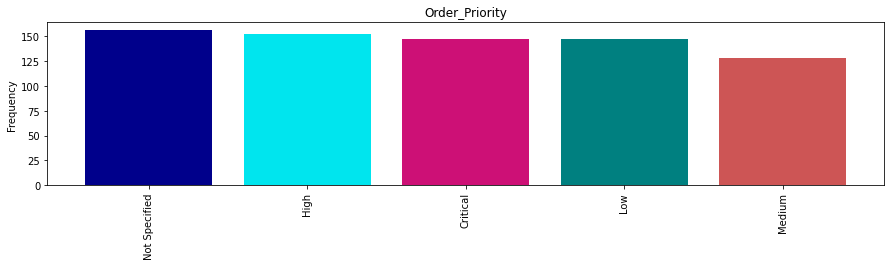

Order_Priority: 
 Not Specified    156
High             152
Critical         147
Low              147
Medium           128
Name: Order_Priority, dtype: int64


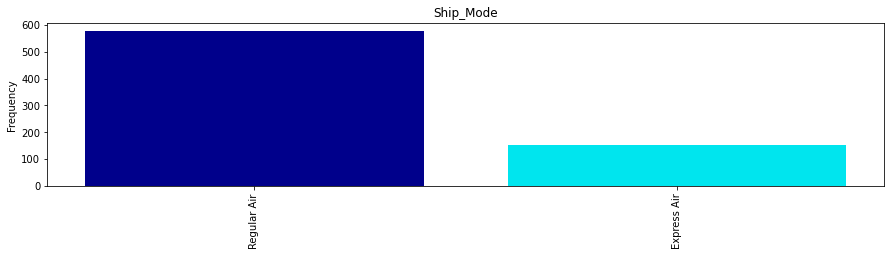

Ship_Mode: 
 Regular Air    579
Express Air    151
Name: Ship_Mode, dtype: int64


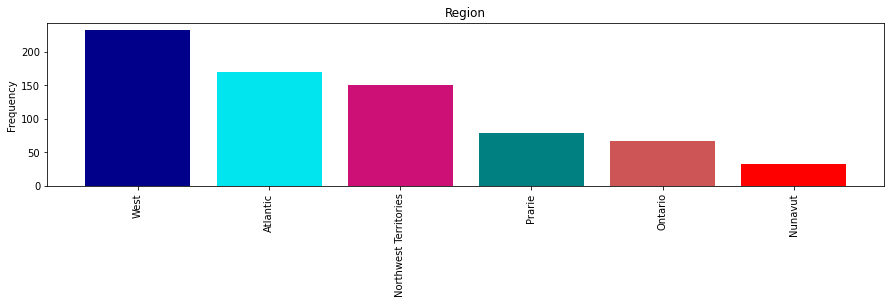

Region: 
 West                     232
Atlantic                 170
Northwest Territories    150
Prarie                    79
Ontario                   67
Nunavut                   32
Name: Region, dtype: int64


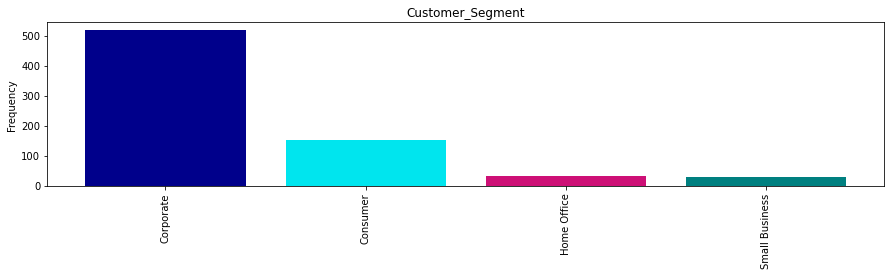

Customer_Segment: 
 Corporate         518
Consumer          153
Home Office        31
Small Business     28
Name: Customer_Segment, dtype: int64


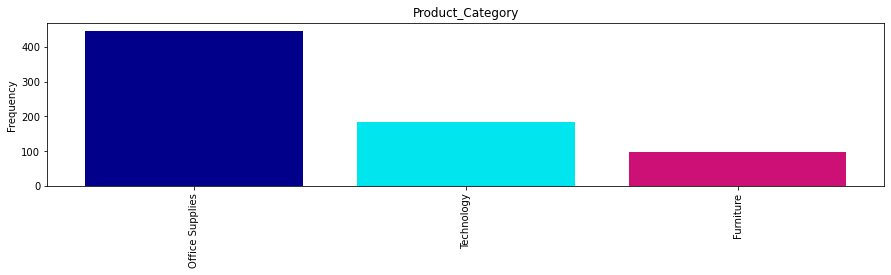

Product_Category: 
 Office Supplies    447
Technology         185
Furniture           98
Name: Product_Category, dtype: int64


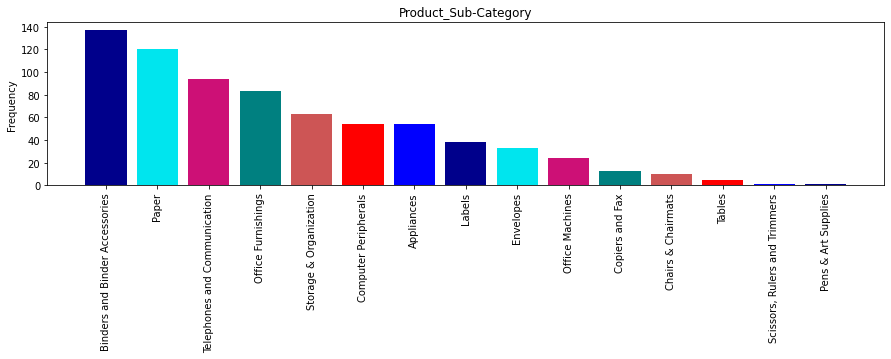

Product_Sub-Category: 
 Binders and Binder Accessories    137
Paper                             120
Telephones and Communication       94
Office Furnishings                 83
Storage & Organization             63
Computer Peripherals               54
Appliances                         54
Labels                             38
Envelopes                          33
Office Machines                    24
Copiers and Fax                    13
Chairs & Chairmats                 10
Tables                              5
Scissors, Rulers and Trimmers       1
Pens & Art Supplies                 1
Name: Product_Sub-Category, dtype: int64


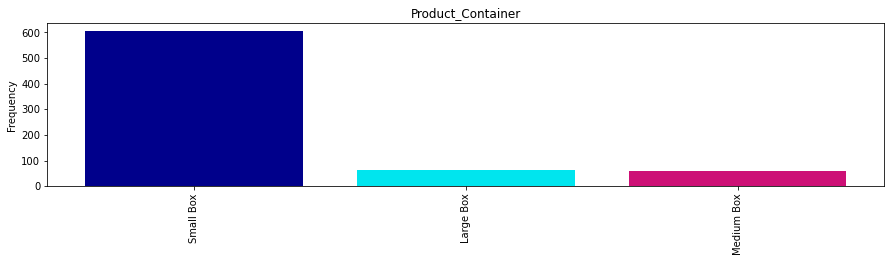

Product_Container: 
 Small Box     606
Large Box      63
Medium Box     61
Name: Product_Container, dtype: int64


In [65]:
categorical_cols = ['Order_Priority', 'Ship_Mode', 'Region', 'Customer_Segment', 'Product_Category', 'Product_Sub-Category', 
                    'Product_Container']
for c in categorical_cols:
    bar_plot(c)

In [66]:
import matplotlib.pyplot as plt
import squarify 

def treemaps(variable):
    var = sales[variable].value_counts()

    plt.style.use('default')
    plt.figure(figsize = (7, 5))
    squarify.plot(sizes = var.values, label = var.index, value = var.values)
    plt.title(variable + ' Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
    plt.show()

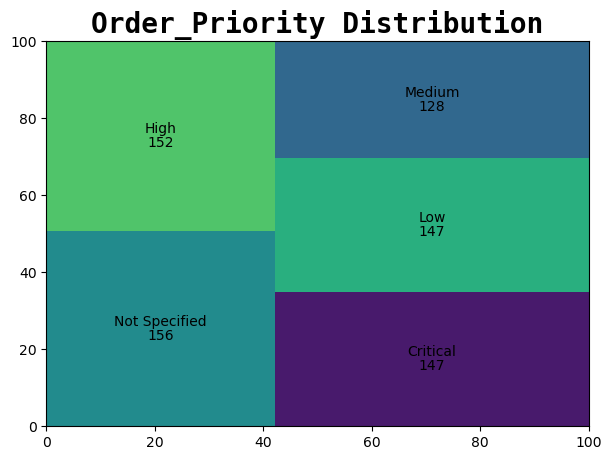

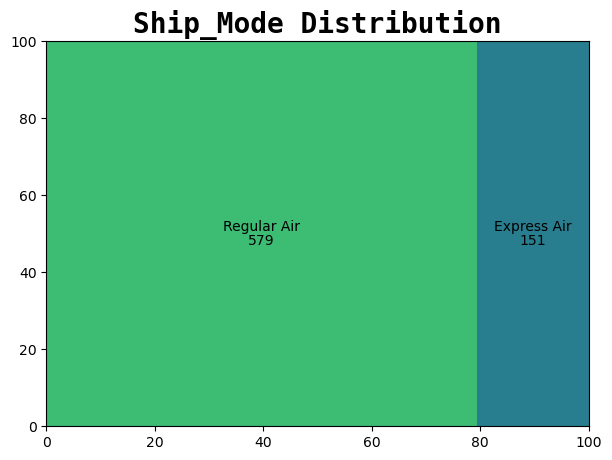

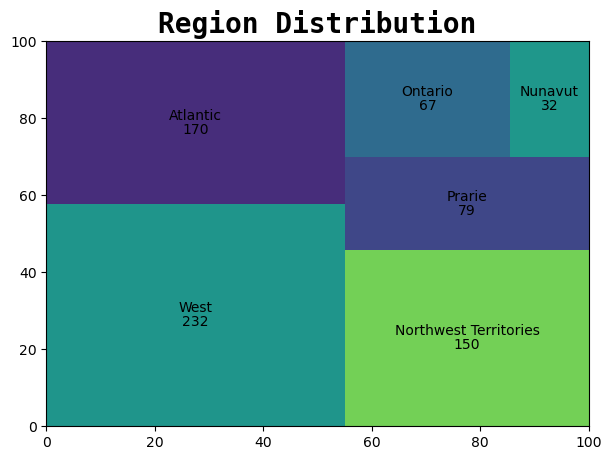

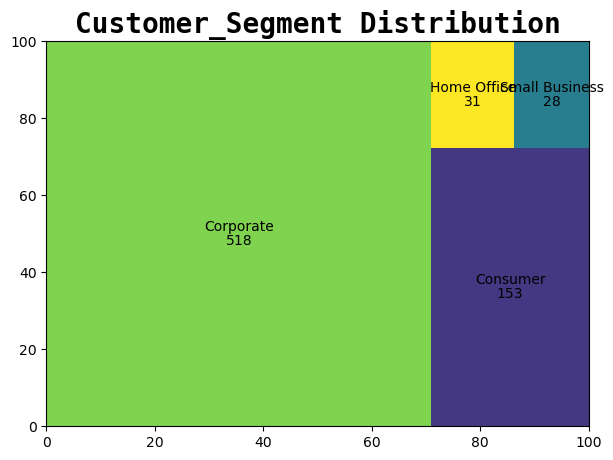

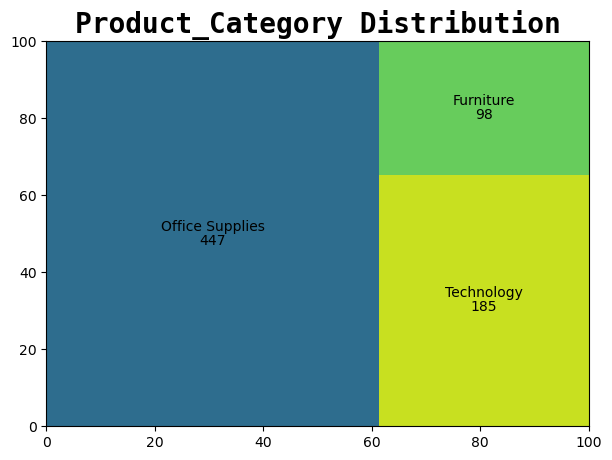

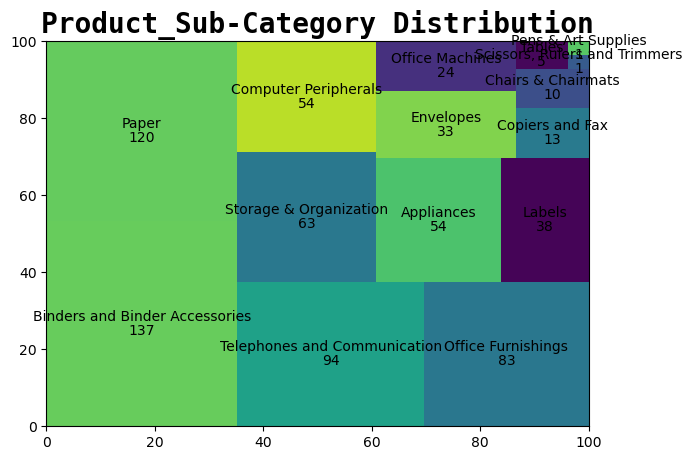

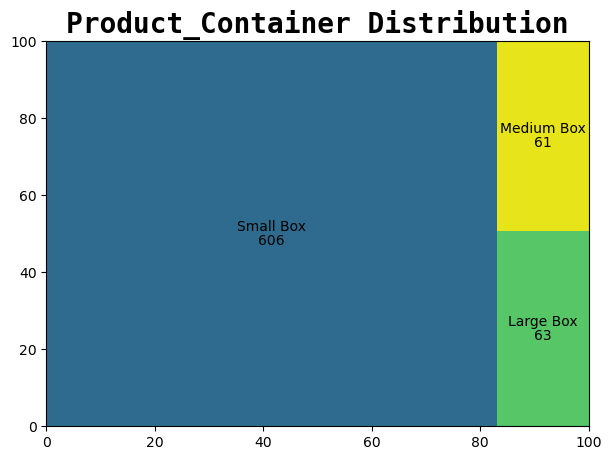

In [67]:
treemap_cols = ['Order_Priority', 'Ship_Mode', 'Region', 'Customer_Segment', 'Product_Category', 'Product_Sub-Category', 
                    'Product_Container']
for c in treemap_cols:
    treemaps(c)